In [257]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [258]:
#Loading the dataset
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

In [259]:
# Training Data
'''
TRAINING DATA
5400 - ones/zeros
5400 - other 
    [600 * 9 of 1/0 to 9]
'''

x_train_0 = x_full[y_full == 0][:5400]
y_train_0 = np.ones((5400,))
print("shape_training_0 =>")
print("\t",x_train_0.shape)
print("\t",y_train_0.shape)

x_train_others = []
y_train_others = []
for digit in range(1,10):
    x_digit = x_full[y_full == digit][:600]
    y_digit = np.zeros((600,))  
    x_train_others.append(x_digit)
    y_train_others.append(y_digit)
print("lenght_training_other =>")
print("\t",len(x_train_others),len(y_train_others))

x_train_others = np.concatenate(x_train_others, axis=0)
y_train_others = np.concatenate(y_train_others, axis=0)
print("shape_training_other =>")
print("\t",x_train_others.shape)
print("\t",y_train_others.shape)

x_train = np.concatenate([x_train_0, x_train_others], axis=0)
y_train = np.concatenate([y_train_0, y_train_others], axis=0)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
print("shape_training_complete =>")
print("\t",x_train.shape)
print("\t",y_train.shape)


shape_training_0 =>
	 (5400, 28, 28)
	 (5400,)
lenght_training_other =>
	 9 9
shape_training_other =>
	 (5400, 28, 28)
	 (5400,)
shape_training_complete =>
	 (10800, 28, 28)
	 (10800,)


In [260]:
# Testing Data
'''
TESTING DATA
810 - ones/zeros
810 - other 
    [90 * 9 of 1/0 to 9]
'''

x_test_0 = x_test_full[y_test_full == 0][:810]
y_test_0 = np.ones((810,))
print("shape_testing_0 =>")
print("\t",x_test_0.shape)
print("\t",y_test_0.shape)

x_test_others = []
y_test_others = []
for digit in range(1,10):
    x_digit = x_test_full[y_test_full == digit][:90]
    y_digit = np.zeros((90,))  
    x_test_others.append(x_digit)
    y_test_others.append(y_digit)
print("lenght_testing_other =>")
print("\t",len(x_test_others),len(y_test_others))

x_test_others = np.concatenate(x_test_others, axis=0)
y_test_others = np.concatenate(y_test_others, axis=0)
print("shape_testing_other =>")
print("\t",x_test_others.shape)
print("\t",y_test_others.shape)


x_test = np.concatenate([x_test_0, x_test_others], axis=0)
y_test = np.concatenate([y_test_0, y_test_others], axis=0)
x_test, y_test = shuffle(x_test, y_test, random_state=42)
print("shape_testing_complete =>")
print("\t",x_test.shape)
print("\t",y_test.shape)


shape_testing_0 =>
	 (810, 28, 28)
	 (810,)
lenght_testing_other =>
	 9 9
shape_testing_other =>
	 (810, 28, 28)
	 (810,)
shape_testing_complete =>
	 (1620, 28, 28)
	 (1620,)


In [261]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dense(2704, activation='relu'))
#model.add(layers.Dense(1352, activation='relu'))
model.add(layers.Dense(676, activation='relu'))
model.add(layers.Dense(338, activation='relu'))
model.add(layers.Dense(169, activation='relu'))
model.add(layers.Dense(85, activation='relu'))
model.add(layers.Dense(42, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 676)            │       914,628 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 338)            │       228,826 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 169)            │        57,291 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 85)             │        14,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 42)             │         3,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 21)             │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 11)             │           242 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_179 (Dense)               │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_180 (Dense)               │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,220,121 (4.65 MB)

 Trainable params: 1,220,121 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

In [262]:
'''
26 weights
27 bias 0
'''
x=model.get_weights()[22]
print((x))

[[-0.18258154]
 [-1.1873658 ]]


In [263]:
def load_model_weights(model, weight_dir="../../generateModelWeights_week4/InitWeightsParallelSparse"):
    
    for layer_num, layer in enumerate(model.layers):
        file_path = os.path.join(weight_dir, f"layer_number_{layer_num}.npz")
        if os.path.exists(file_path):
            loaded = np.load(file_path)
            weights = [loaded[key] for key in loaded]
            if layer.weights: 
                layer.set_weights(weights)
                print(f"Loaded weights for layer {layer_num} from {file_path}")
            else:
                print(f"Layer {layer_num} has no weights.")
        else:
            print(f"No weights found for layer {layer_num}.")

load_model_weights(model)

Loaded weights for layer 0 from ../../generateModelWeights_week4/InitWeightsParallelSparse\layer_number_0.npz
No weights found for layer 1.
No weights found for layer 2.
Loaded weights for layer 3 from ../../generateModelWeights_week4/InitWeightsParallelSparse\layer_number_3.npz
Loaded weights for layer 4 from ../../generateModelWeights_week4/InitWeightsParallelSparse\layer_number_4.npz
Loaded weights for layer 5 from ../../generateModelWeights_week4/InitWeightsParallelSparse\layer_number_5.npz
Loaded weights for layer 6 from ../../generateModelWeights_week4/InitWeightsParallelSparse\layer_number_6.npz
Loaded weights for layer 7 from ../../generateModelWeights_week4/InitWeightsParallelSparse\layer_number_7.npz
Loaded weights for layer 8 from ../../generateModelWeights_week4/InitWeightsParallelSparse\layer_number_8.npz
Loaded weights for layer 9 from ../../generateModelWeights_week4/InitWeightsParallelSparse\layer_number_9.npz
Loaded weights for layer 10 from ../../generateModelWeights_

In [264]:
'''
Should match
[[0.3212726]
 [0.8858186]]

'''
x=model.get_weights()[22]
print((x))

[[0.3212726]
 [0.8858186]]


In [265]:
class SaveWeightsCallback(callbacks.Callback):
    def __init__(self, save_dir):
        super(SaveWeightsCallback, self).__init__()
        self.save_dir = save_dir

    def on_epoch_end(self, epoch, logs=None):
        epoch_dir = os.path.join(self.save_dir, f"AfterEpoch{epoch + 1}")
        if not os.path.exists(epoch_dir):
            os.makedirs(epoch_dir)
        
        for layer_num, layer in enumerate(self.model.layers):
            if layer.weights:  # Only save weights for layers that have weights
                file_path = os.path.join(epoch_dir, f"Layer_{layer_num}.npz")
                weights = layer.get_weights()
                np.savez(file_path, *weights)
                print(f"Saved weights for layer {layer_num} to {file_path}")


In [266]:
save_dir = "./ZeroModelWeightsTraining"
save_weights_callback = SaveWeightsCallback(save_dir)

In [267]:
history = model.fit(
    x_train, y_train,
    epochs=5,  
    callbacks=[save_weights_callback]
)

Epoch 1/5
337/338 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8995 - loss: 0.4407Saved weights for layer 0 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_0.npz
Saved weights for layer 3 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_3.npz
Saved weights for layer 4 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_4.npz
Saved weights for layer 5 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_5.npz
Saved weights for layer 6 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_6.npz
Saved weights for layer 7 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_7.npz
Saved weights for layer 8 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_8.npz
Saved weights for layer 9 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_9.npz
Saved weights for layer 10 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_10.npz
Saved weights for layer 11 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_11.npz
Saved weights for layer 12 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_12.npz
Saved weights for layer 13 to 

In [268]:
for epoch, accuracy in enumerate(history.history['accuracy'], 1):
    print(f"Epoch {epoch}: Accuracy = {accuracy:.4f}")


Epoch 1: Accuracy = 0.9546
Epoch 2: Accuracy = 0.9842
Epoch 3: Accuracy = 0.9880
Epoch 4: Accuracy = 0.9922
Epoch 5: Accuracy = 0.9918


In [269]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.1418
Test accuracy: 0.989506185054779


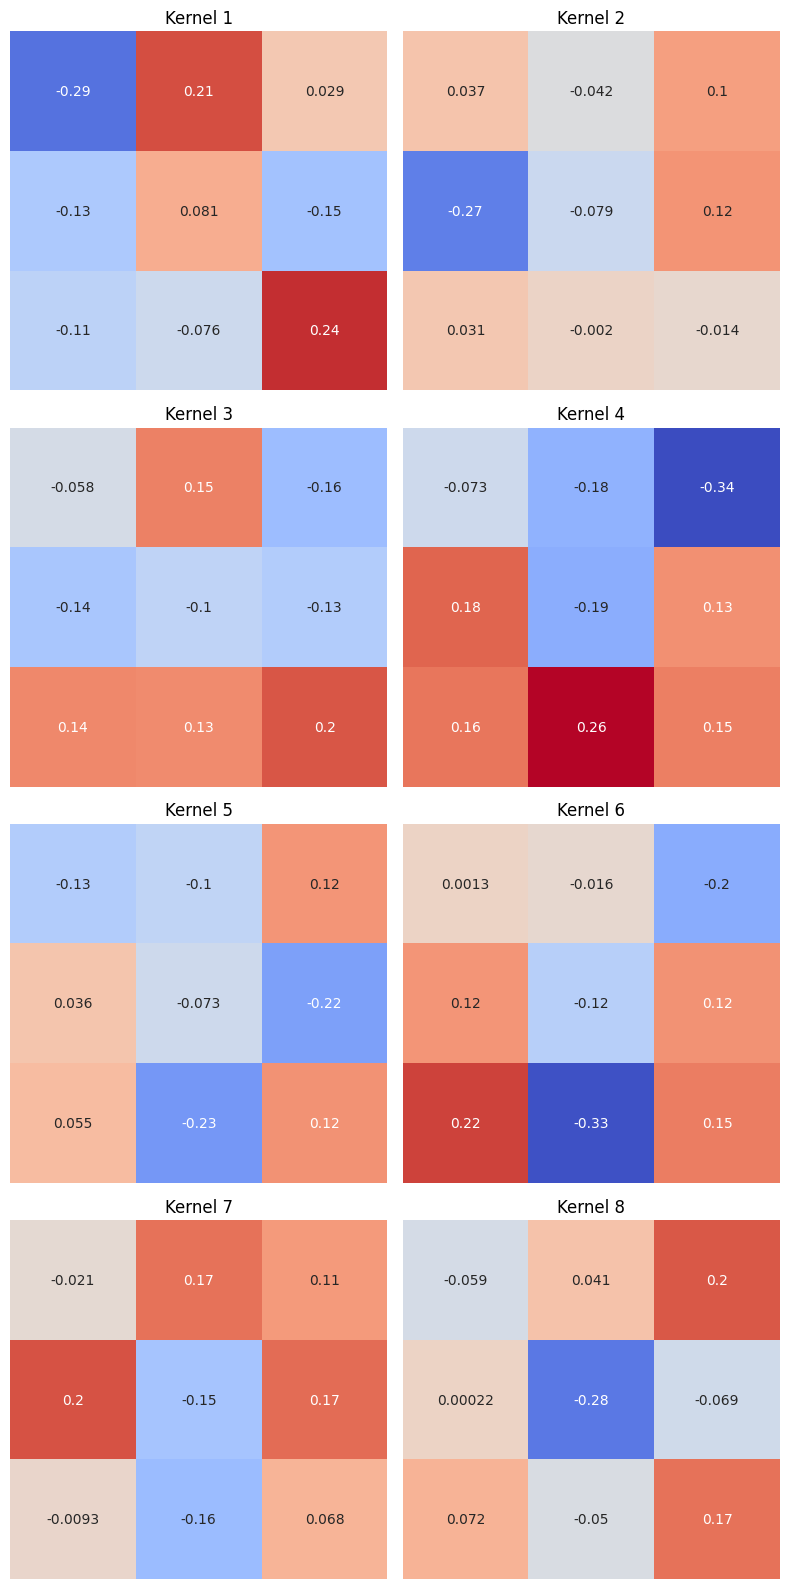

In [270]:
kernels = model.layers[0].get_weights()[0]
min_val = np.min(kernels)
max_val = np.max(kernels)
selected_kernels = list(range(8))

fig, axes = plt.subplots(4,2, figsize=(8, 16))
for i, kernel_idx in enumerate(selected_kernels):
    row, col = divmod(i, 2)
    kernel = kernels[:, :, 0, kernel_idx]  # 3x3 for each kernel
    sns.heatmap(kernel, vmin=min_val, vmax=max_val, annot=True, cmap="coolwarm", cbar=False, ax=axes[row, col])
    axes[row, col].set_title(f'Kernel {kernel_idx+1}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()
